In [ ]:
import torch
from torch import nn
#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
#visual
import matplotlib.pyplot as plt

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  2.6.0+cu124
Torchvision Version:  0.21.0+cu124


#1. Getting a dataset
- we will be using fashion MNIST dataset

In [ ]:
#setup training data
train_data=datasets.FashionMNIST(
    root="data",#where to download data to?
    train=True,#do we want the training dataset
    download=True,#do we want to download dataset
    transform=ToTensor(),#how do we want to transform the data?
    target_transform=None#how do we want to transform the labels/targets
)
#setup testing data
test_data=datasets.FashionMNIST(
    root="data",#where to download data to?
    train=False,#do we want the training dataset
    download=True,#do we want to download datset
    transform=ToTensor(),#how do we want to transform the data?
    target_transform=None#how do we want to transform the labels/targets
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
#see the first training example
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#check shape
image,label=train_data[0]
image.shape,label,class_names[label]

(torch.Size([1, 28, 28]), 9, 'Ankle boot')

##visualising the data

Image shape:
torch.Size([1, 28, 28])
Label: 9


Text(0.5, 1.0, 'Ankle boot')

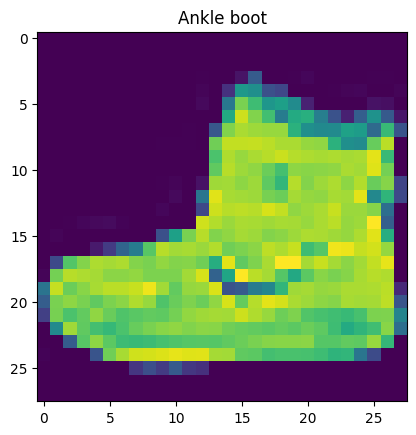

In [ ]:
image,label = train_data[0]
print(f"Image shape:\n{image.shape}")
print(f"Label: {label}")
#plt.imshow(image)
plt.imshow(image.squeeze());
plt.title(class_names[label])
#plt.axis(False)

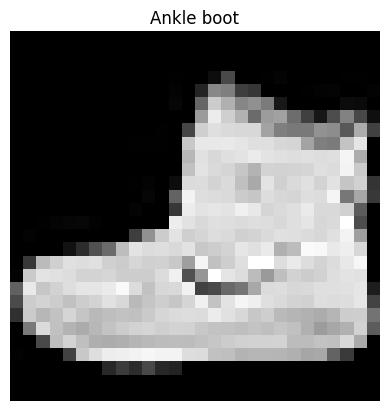

In [ ]:
plt.imshow(image.squeeze(),cmap="gray");
plt.title(class_names[label]);
plt.axis(False);

In [ ]:
#plot more images

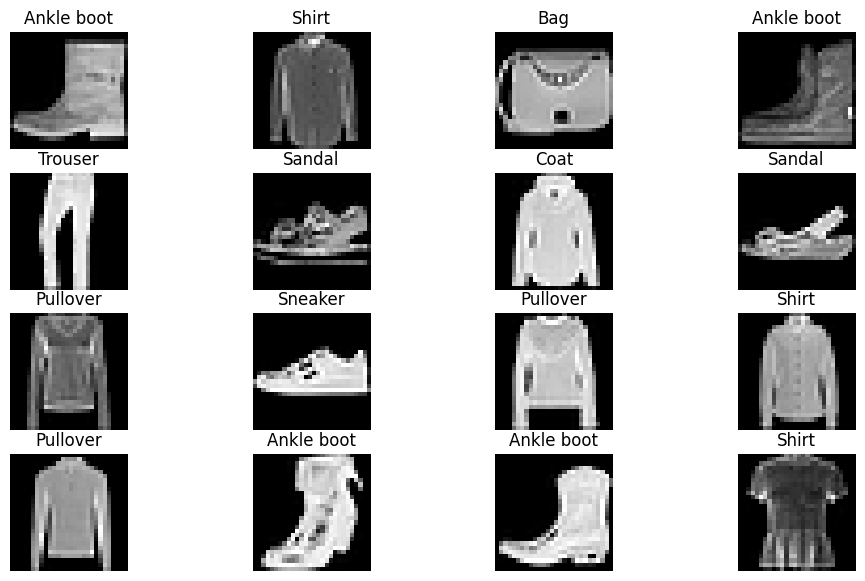

In [ ]:
torch.manual_seed(42);
fig = plt.figure(figsize=(12,7));
rows,cols = 4,4;
for i in range(1,rows*cols+1):
  random_indexes = torch.randint(0,len(train_data),size=[1]).item()
  #print(random_indexes)
  img,label = train_data[random_indexes]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

DO you think these items canbe modelled with pure linear lines? or we need non linear lines?

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

##prepare Dataloader
Right now our data is in form of pytorch datasets
Dataloader turns our dataset into python iterable
More specifically we wnt to turn our data into batches(or mini-batches)
WHY WOULD WE DO THIS?
1. It is more computationally efficient, as in, your computer hardware may not be able to look(store in memory) at 60,000 images in one hit.So we break it down to 32 images at a time(batch size of 32)
2. It gives our neural network more chances to update gradients per epoch.

In [ ]:
#Turn train set into dataloader
from torch.utils.data import DataLoader
train_dataloader= DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader= DataLoader(dataset=test_data,batch_size=32,shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78ffe4989dd0>,
 <torch.utils.data.dataloader.DataLoader at 0x78ffe1ae2c10>)

In [ ]:
#lets checkout what have we created
print(f"Dataloader:{train_dataloader}\nLength:{len(train_dataloader)}\nType:{type(train_dataloader)}")
print(f"Dataloader:{test_dataloader}\nLength:{len(test_dataloader)}\nType:{type(test_dataloader)}")

Dataloader:<torch.utils.data.dataloader.DataLoader object at 0x78ffe4989dd0>
Length:1875
Type:<class 'torch.utils.data.dataloader.DataLoader'>
Dataloader:<torch.utils.data.dataloader.DataLoader object at 0x78ffe1ae2c10>
Length:313
Type:<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
#check out whats inside the dataloader
train_features_batch, train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 6, Shirt


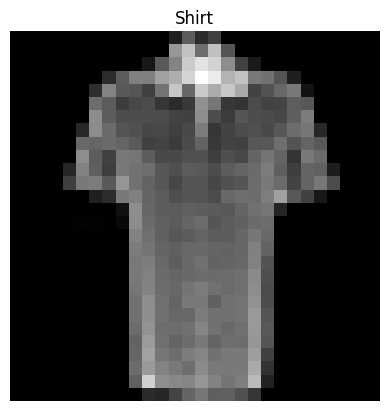

In [ ]:
#show a sample
torch.manual_seed(42)
random_indexes= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_indexes],train_labels_batch[random_indexes]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, {class_names[label]}")

##3 Model0
when starting to build a series of ML modelling experiments, its best practice to start with baseline models.
Start simply and add complexities

In [ ]:
#create a flatten layer
flatten_model = nn.Flatten()
#get a single sample'
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape}")
#flatten
output = flatten_model(x)
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input:int, hidden_units:int, output:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
#setup model with parameters
Model0 = FashionMNISTModelV0(
    input=784,
    hidden_units=10,#how many units in hidden layer
    output=len(class_names)#one for every class
)
Model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
Model0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

##setup loss ,optimizer and evaluation metric
-> loss function - since we are working on multiclass data, our loss_function is nn.CrossEntropyLoss
-> optimizer - SGD
- Evaluation metric - Since we are working on classification problem, lets use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path
#download helper functions from Learn Pytorch Repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper_functions.py already exists


In [ ]:
#import accuray metric
from helper_functions import accuracy_fn
#set up loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model0.parameters(),lr=0.01)

##Cerating function to time our experimnets
Ml is all about experiments

Two main thing you want to track are-
- models performance
- how fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  '''Prints difference between start and end time'''
  total_time= end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
#code...
end_time = timer()
print_train_time(start=start_time,end=end_time,device='cpu')

Train time on cpu: 0.000 seconds


4.878200002167432e-05

## Cretae trainning loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches , perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches , perform testing steps, calculate the test loss *per batch*.
4. Print whats happening
5. Time it all

In [ ]:
#mport tqdm for progress bar
from tqdm.auto import tqdm
#set the seed and start the timer
torch.manual_seed(42)
start_time_on_cpu=timer()
#set the number of epochs(keep less for faster trainning time)
epochs=3
#Create trainig loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  #training
  train_loss =0
  #add a loop to loop through training batches
  for batch,(X,y) in enumerate(train_dataloader):
    Model0.train()
    #1. Forward Pass
    y_pred=Model0(X);
    #2. calculate the l;oss
    loss = loss_fn(y_pred,y)
    train_loss+=loss#accumulate trsin loss
    #3. Optimixwer zero grad
    optimizer.zero_grad()
    #4. loss backward
    loss.backward()
    #5. Optimizer step
    optimizer.step()
    #print out how many samples have been seen
    if batch % 400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  #divide total train loss by len of dataloader
  train_loss/=len(train_dataloader)
  ###Testing
  test_loss,test_acc=0,0
  Model0.eval();
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #1. Forward pass
      test_pred=Model0(X_test)
      #2. calculate loss(accumulatively)
      test_loss+=loss_fn(test_pred,y_test)
      #calculate accuracy(accumulatively)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    #divide total test loss by len of dataloader
    test_loss/=len(test_dataloader)
    #divide total test acc by len of dataloader
    test_acc/=len(test_dataloader)
  #print out whats happening
  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")
end_time_on_cpu=timer()
print_train_time(start=start_time_on_cpu,end=end_time_on_cpu,device='cpu')



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.90961 | Test loss: 0.62902 | Test acc: 78.63%
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.55733 | Test loss: 0.54409 | Test acc: 81.13%
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.50266 | Test loss: 0.51368 | Test acc: 82.00%
Train time on cpu: 37.363 seconds


37.36266164899996

#Make predictions and get model results


In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  '''Returns a dictionary containing the results of model predicting on data_loader'''
  loss,acc=0,0
  model.eval();
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #1. Forward pass
      y_pred=model(X)
      #2. Calculate loss and accuracy
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #Scale the loss and acc to find avg loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)
  return {"model_name":model.__class__.__name__,#only works when model was created with a class
          "model_loss":loss.item(),
          "model_acc":acc}
#Calculate Model0 results on test dataset
Model0_results=eval_model(Model0,test_dataloader,loss_fn,accuracy_fn)
Model0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5136751532554626,
 'model_acc': 81.9988019169329}

#Set up Device agnostic code

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#set up device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#Non linear Model V1

In [ ]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,input:int,hidden_units:int,output:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output),
        nn.ReLU()
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
Model1 = FashionMNISTModelV1(input=784,hidden_units=10,output=len(class_names)).to(device)
Model1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28]).to(device)
Model1(dummy_x)

tensor([[0.0806, 0.1593, 0.1565, 0.0000, 0.4741, 0.1441, 0.1634, 0.3834, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)

In [ ]:
#import accuracy metric
from helper_functions import accuracy_fn
#set up loss func and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model1.parameters(),lr=0.01)

##Functionizing training and testing loop

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader : torch.utils.data.dataloader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  '''Trains a PyTorch model for a single epoch.
  Turns a target PyTorch model to training mode and then
  runs through all of the required training steps (forward
  pass, loss calculation, optimizer step).
  Args:
    model: A PyTorch model to be trained.
    data_loader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    accuracy_fn: A custom accuracy function to determine model accuracy.
    device: A target device to compute on (e.g. "cuda" or "cpu").
    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:
    (0.1112, 0.8743)
  '''
  train_loss,train_acc=0,0
  model.train()
#add a loop to loop through training batches
  for batch,(X,y) in enumerate(data_loader):
    #put data on target device
    X,y=X.to(device),y.to(device)
    #1. Forward Pass(outputs raw logits from the model)
    y_pred=model(X);
    #2. calculate the loss and accuracy per batch
    loss = loss_fn(y_pred,y)
    train_loss+=loss#accumulate train loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))#go from raw logits to prediction labels
    #3. Optimixwer zero grad
    optimizer.zero_grad()
    #4. loss backward
    loss.backward()
    #5. Optimizer step
    optimizer.step()
    #print out how many samples have been seen
    if batch % 400 ==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  #divide total train loss and accuracy by len of dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")
  return train_loss,train_acc

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  '''Tests a PyTorch model for a single epoch.
  Turns a target PyTorch model to "eval" mode and then performs
  a forward pass on a testing dataset. Calculates the loss and
  accuracy values along the way.
  Args:
    model: A PyTorch model to be tested.
    data_loader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    accuracy_fn: A custom accuracy function to determine model accuracy.
    device: A target device to compute on (e.g. "cuda" or "cpu").
    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:
    (0.0223, 0.8985)
  '''
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      #Do the forward pass(output raw logits)
      test_pred=model(X_test)
      #calculate the test loss and accuracy
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
    #divide total test loss by len of dataloader
    test_loss/=len(data_loader)
    #divide total test acc by len of dataloader
    test_acc/=len(data_loader)
  #print out whats happenning
  print(f"test_loss = {test_loss:.5f}, test_acc = {test_acc:.2f}%")
  return test_loss,test_acc

In [ ]:
#import tqdm for progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)
start_time_on_gpu=timer()
#set the number of epochs(keep less for faster trainning time)
epochs=3
#Create trainig loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(Model1,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(Model1,test_dataloader,loss_fn,accuracy_fn,device)
end_time_on_gpu=timer()
print_train_time(start_time_on_gpu,end_time_on_gpu,device='gpu')


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.42179 | Train acc: 54.29%
test_loss = 1.12168, test_acc = 62.15%
Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.03359 | Train acc: 64.61%
test_loss = 1.00019, test_acc = 64.48%
Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.95996 | Train acc: 66.05%
test_loss = 0.96338, test_acc = 65.41%
Train time on gpu: 31.905 seconds


31.904859673000033